# Python Filter Test
- Band Pass Filter Process
- Block Process
- Overlap add Process
- FIR Filter Process Test



In [1]:
'''
# 라이브러리 정의
 - 시스템 라이브러리
 - 오디오 관련 라이브러리
 - 연산 및 Plot 관련 라이브러리 
 - 샤용자 라이브러리
'''

# Import Systems 
import struct
import io
import os
import sys
import math
import platform

# Import Audio
import pyaudio
import librosa
import soundfile

import numpy as np
import scipy
import scipy.signal as sig
import matplotlib.pyplot as plt

# User Libraries
import pyOssWavfile
import pyRoomAcoustic as room
import pyOssDebug as dbg
import pyOssFilter



float32


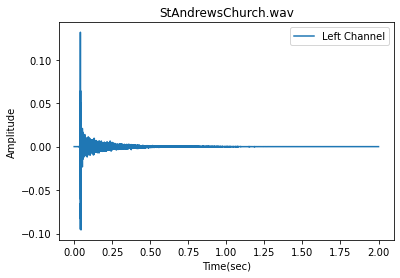

In [2]:
# .wav File Open

#############################################################################
#  Impulse Data Load -------------------------------------------------------#
#############################################################################

impulse_dir = os.path.join(os.getcwd(), 'impulsefiles')     # Path of audiofiles folder

# IMPULSE WAVE FILE
# wav_fname_impulse = "TyndallBruceMonument"
# wav_fname_impulse = "ElvedenHallMarbleHall'"
# wav_fname_impulse = "EmptyApartmentBedroom"
# wav_fname_impulse = "FalklandPalaceRoyalTennisCourt"
# wav_fname_impulse = "InsidePiano"
# wav_fname_impulse = "MaesHowe"
# wav_fname_impulse = "SportsCentreUniversityOfYork"
# wav_fname_impulse = "StairwayUniversityOfYork"
wav_fname_impulse = "StAndrewsChurch"
# wav_fname_impulse = "mh3_000_ortf_48k"
# wav_fname_impulse = "mh3_000_wx_48k"
# wav_fname_impulse = "anechoic_gunshot_0.44.1kHz.f32"
# wav_fname_impulse = "10s sweep for 3s reverb 48k"

impulse_fname = os.path.join(impulse_dir, wav_fname_impulse + '.wav')  #path + filename

impulse_fmt_chunk = pyOssWavfile.read_format(impulse_fname)
impulse_struct_fmt = pyOssWavfile.extractWavFmtChunk(impulse_fmt_chunk)

if impulse_struct_fmt.bitdepth == 24:        # Bitdepth가 24bit일 때는 pysoundfile을 이용하여 wav data를 불러옴
    impulse_data, impulse_struct_fmt.fs = soundfile.read(impulse_fname, dtype='int32')
else:                                       # 그 외에는 scipy.io.wavfile을 수정한 함수 pyOssWavfile을 이용하여 wav data를 불러옴
    impulse_fmt_chunk, impulse_data, impulse_length = pyOssWavfile.read(impulse_fname)

# Type Conversion int to float32
if impulse_data.dtype == 'int16':
    impulse_data = np.float32(impulse_data/(2**15-1))
elif impulse_data.dtype == 'int32':
    impulse_data = np.float32(impulse_data/(2**31-1))

impulse_time = impulse_data.shape[0] / impulse_struct_fmt.fs

print(impulse_data.dtype)
dbg.dPlotAudio(impulse_struct_fmt.fs, impulse_data[:,0], wav_fname_impulse + '.wav', "Left Channel", "Time(sec)", "Amplitude")


In [ ]:
pyOssWavfile.write(os.path.join(impulse_dir, wav_fname_impulse +'.44.1kHz.f32.wav'), 44100, np.float32(impulse_data) )


In [8]:
# .wav File Open

##############################################################################
#  AUDIO Data Load ----------------------------------------------------------#
##############################################################################

audio_dir = os.path.join(os.getcwd(), 'audiofiles')

# TEST AUDIO WAVE FILE LIST
#wav_fname_audio = "adult_female_speech"
#wav_fname_audio = "bagpipe_music"
#wav_fname_audio = "bagpipe_steady_chord"
#wav_fname_audio = "flute_arpeggio"
#wav_fname_audio = "flute_music"
wav_fname_audio = "singing"
#wav_fname_audio = "tuba_arpeggio"
#wav_fname_audio = "tuba_music"

audio_fname = os.path.join(audio_dir, wav_fname_audio + '.wav')  #path + filename + extention

audio_fmt_chunk = pyOssWavfile.read_format(audio_fname)
audio_struct_fmt = pyOssWavfile.extractWavFmtChunk(audio_fmt_chunk)

if audio_struct_fmt.bitdepth == 24:        # Bitdepth가 24bit일 때는 pysoundfile을 이용하여 wav data를 불러옴
    audio_data, audio_struct_fmt.fs = soundfile.read(audio_fname, dtype='int32')
else:                                       # 그 외에는 scipy.io.wavfile을 수정한 함수 pyOssWavfile을 이용하여 wav data를 불러옴
    audio_fmt_chunk, audio_data, audio_length = pyOssWavfile.read(audio_fname)

print(audio_data.ndim)
print(audio_length)
print(audio_data.shape[0])

print(audio_data.dtype)

# # Type Conversion int to float
if audio_data.dtype == 'int16':
    audio_data = np.float32(audio_data/(2**15-1))
elif audio_data.dtype == 'int32':
    audio_data = np.float32(audio_data/(2**31-1))

print(audio_data.dtype)

audio_time = audio_data.shape[0] / audio_struct_fmt.fs


1
467746
233873
int16
float32


0.032063492063492065


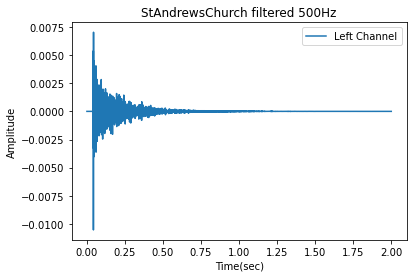

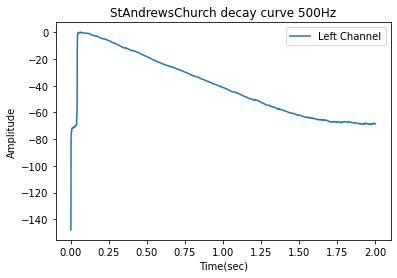

Impulse Name: StAndrewsChurch, Filter: Butterworth 2nd Order, 500Hz
T10= [[0.254]]
T20= [[0.415]]
T30= [[0.641]]
RT60(from T30*2)= [[1.282]]
EDT= [[1.524]]
D50= 0.37683282862966644
C50= -2.1845583620792084
C80= 0.725733041301329


In [4]:
array_fc = [125, 250, 500, 1000, 2000, 4000, 8000, 16000]

fc = 500

impulse_data_filtered, decaycurve_filtered, acoustic_param = pyOssFilter.calc_filt_impulse(impulse_data, impulse_struct_fmt.fs, fc, fname=wav_fname_impulse)


array_fc = [125, 250, 500, 1000, 2000, 4000, 8000, 16000]

fc = 1000

band_f1, band_f2 = pyOssFilter.band_range(fc)

# Band Pass Filter Butterworth 2th order
filter_name = "Butterworth 2nd Order" 
impulse_data_filtered = pyOssFilter.bandpass_filter(impulse_data[:,0], band_f1, band_f2, impulse_struct_fmt.fs, order=2)

# Band Pass Filter FIR Hamming
# filter_name = "FIR 128tab Hamming"
# firtab = 128
# if band_f2 > 20000:
#     band_f2 = 20000
# coef_fir1 = np.float32(sig.firwin(firtab, [band_f1, band_f2], pass_zero=False, fs=audio_struct_fmt.fs))
# impulse_data_filtered = sig.fftconvolve(impulse_data[:,0], coef_fir1)

# Plot Filtered Impulse Data
dbg.dPlotAudio(impulse_struct_fmt.fs, impulse_data_filtered, wav_fname_impulse + ' filtered ' + str(fc) + 'Hz', "Left Channel", "Time(sec)", "Amplitude")

# Calculation Normalized Decay Curve
impulse_decaycurve = np.float32(room.decayCurve(impulse_data_filtered, impulse_time, impulse_struct_fmt.fs))
dbg.dPlotAudio(impulse_struct_fmt.fs, impulse_decaycurve, wav_fname_impulse + ' decay curve ' + str(fc) + 'Hz', "Left Channel", "Time(sec)", "Amplitude")
print(impulse_decaycurve.dtype)

# Calculation Acoustic Parameters
impulse_EDT, impulse_EDTnonLin = room.EDT(impulse_decaycurve, impulse_struct_fmt.fs)
impulse_t20, impulse_t20nonLin = room.T20(impulse_decaycurve, impulse_struct_fmt.fs)
impulse_t30, impulse_t30nonLin = room.T30(impulse_decaycurve, impulse_struct_fmt.fs)
impulse_t60, impulse_t60nonLin = room.RT60(impulse_decaycurve, impulse_struct_fmt.fs) 
impulse_D50 = room.D50(impulse_data_filtered, impulse_struct_fmt.fs)
impulse_C80 = room.C80(impulse_data_filtered, impulse_struct_fmt.fs)
impulse_C50 = room.C50(impulse_data_filtered, impulse_struct_fmt.fs)

print("Impulse Name: " + wav_fname_impulse + ", Filter: " + filter_name + ", " + str(fc) + "Hz" )
print(str(fc) +"Hz impulse_T10=", impulse_EDT/6)      # for Debug
print(str(fc) +"Hz impulse_T20=", impulse_t20, "impulse_RT60(use T20x3)=", impulse_t20 * 3 )          # for Debug
print(str(fc) +"Hz impulse_T30=", impulse_t30, "impulse_RT60(use T30x2)=", impulse_t30 * 2 )          # for Debug
print(str(fc) +"Hz impulse_RT60=", impulse_t60)            # for Debug
print(str(fc) +"Hz impulse_EDT=", impulse_EDT)            # for Debug
print(str(fc) +"Hz impulse_D50=", impulse_D50)         # for Debug
print(str(fc) +"Hz impulse_C50=", impulse_C50)         # for Debug
print(str(fc) +"Hz impulse_C80=", impulse_C80)         # for Debug


In [ ]:
# FIR Filter Test
array_fc = [125, 250, 500, 1000, 2000, 4000, 8000, 16000]

# FIR Bandpass Fitler Design
firtab = 128

fc = 250

band_f1, band_f2 = pyOssFilter.band_range(fc)

print(band_f1, band_f2)

coef_fir1 = sig.firwin(firtab, [band_f1, band_f2], pass_zero=False, fs=audio_struct_fmt.fs)
#coef_fir2 = sig.firwin2(firtab)

# filtered = sig.lfilter(coef_fir1, [1.0], audio_data[:,0])
if audio_struct_fmt.ch == 1:
    # filtered = sig.lfilter(coef_fir1, [1.0], audio_data)
    filtered = sig.fftconvolve(audio_data, coef_fir1)
else:
    # filtered = sig.lfilter(coef_fir1, [1.0], audio_data[:,0])
    filtered = sig.fftconvolve(audio_data[:,0], coef_fir1)

dbg.dPlotAudio(audio_struct_fmt.fs, np.float32(filtered), audio_fname, "Left Channel", "Time(sec)", "Amplitude")

# If you want save result to wave file, do uncomment below line
result_dir = os.path.join(os.getcwd(), 'resultfiles')     # Path of save files folder
pyOssWavfile.write(os.path.join(result_dir, wav_fname_audio + '.filtered_' + str(fc) +'Hz.' + 'FIR_tab'+ str(firtab) + '.wav'), int(audio_struct_fmt.fs), np.float32(filtered) )



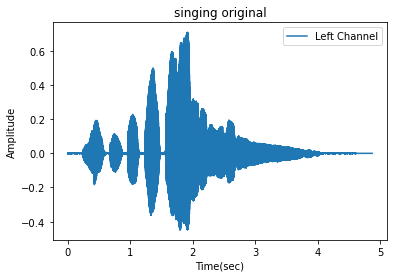

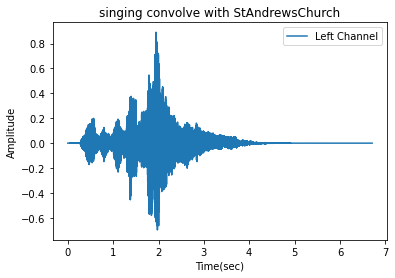

In [6]:
# FFT Convolution Function Test
# Test Audio data with Impulse data

#if audio_struct_fmt.fs != impulse_struct_fmt.fs:

if audio_struct_fmt.ch == 1 and impulse_struct_fmt.ch == 1:
    convolved_data = sig.fftconvolve(audio_data, impulse_data)
elif audio_struct_fmt.ch == 1:
    convolved_data = sig.fftconvolve(audio_data, impulse_data[:,0])
else:
    convolved_data = sig.fftconvolve(audio_data[:,0], impulse_data[:,0])

dbg.dPlotAudio(audio_struct_fmt.fs, audio_data, wav_fname_audio + ' original', "Left Channel", "Time(sec)", "Amplitude")
dbg.dPlotAudio(audio_struct_fmt.fs, ossConvol, wav_fname_audio + ' convolve with ' + wav_fname_impulse, "Left Channel", "Time(sec)", "Amplitude")

# If you want save  result to wave file, do uncomment below line
# result_dir = os.path.join(os.getcwd(), 'resultfiles')     # Path of save files folder
# pyOssWavfile.write(os.path.join(result_dir, wav_fname_audio +'.with.' + wav_fname_impulse + '.convolved.wav'), int(audio_struct_fmt.fs), np.float32(convolved_data) )



In [ ]:
CHUNK = 1024
BUFFER = CHUNK * 4




